## 1. The main objective of this work:

*The main objective of this work is to find a machine learning model that can best help the doctor to diagnosis Pneumonia. I will apply TensorFlow, Keras to pre procss the input X-ray images and build several machine learning models to recognize and classify the X-Ray images to be with presence or no presence of Pneumonia in a person. So it is going to be a binary classification.*

*I will compare the performance of the modeles whih I created from this work and then recommend the one which best suite the objective of this work. I will also highlight the possible flaw in the recommended model and suggest the future possible action plan to revisite the model  with additional data or different modeling technique*

*I will use the dataset available at this LINK https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia for analysis in this worl.*

## 2. Dataset description


The dataset contains 5856 X-rays images in jpeg format. 

The chest X-ray images (anterior-posterior) contained in this dataset were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.


For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

The dataset is organized into 3 folders (train, test, val) and contains 2 subfolders for each image category (Pneumonia/Normal). I have combined the folders in the dataset and re organize all X-Ray images into 2 folders: **PNEUMONIA** and **'NORMAL'**. 

Because the X-ray images cannot be directly processed by a neural network, I will use the built-in methods of Keras to pre process data. 

## 3. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

image_directory = 'data/'
no_pneumonia_list = os.listdir(image_directory + 'NORMAL/') # List names of all images in NORMAL subfolder
yes_pneumonia_list = os.listdir(image_directory + 'PNEUMONIA/') # List names of all images in PNEUMONIA subfolder

### 3.1 Check the number of images

In [2]:
print(len(no_pneumonia_list), "images were classified as NORMAL.")

1583 images were classified as NORMAL.


In [3]:
print(len(yes_pneumonia_list), "images were classified as PNEUMONIA.")

4273 images were classified as PNEUMONIA.


### 3.2 Investigte the size of images

In [4]:
no_img_name = []
no_img_width = []
no_img_height = []

for i, image_name in enumerate(no_pneumonia_list):
    if image_name.split(".")[1] == 'jpeg':
        no_img_name.append(image_name.split(".")[0])
        
        img = cv2.imread(image_directory+ "NORMAL/"+ image_name)
        no_img_width.append(img.shape[0])
        no_img_height.append(img.shape[1])

In [5]:
no_pneumonia_info = {"image_name":no_img_name, "image_width":no_img_width, "image_height":no_img_height}
no_pneumonia_info_df = pd.DataFrame(no_pneumonia_info)
no_pneumonia_info_df

,image_name,image_width,image_height
0,NORMAL2-IM-0927-0001,2234,2359
1,NORMAL2-IM-1056-0001,1067,1422
2,IM-0427-0001,1357,1828
3,NORMAL2-IM-1260-0001,1495,1854
4,IM-0656-0001-0001,1966,2194
...,...,...,...
1578,NORMAL2-IM-1011-0001,1391,1762
1579,NORMAL2-IM-0826-0001,1020,1450
1580,NORMAL2-IM-0221-0001,936,1336
1581,NORMAL2-IM-0198-0001,1688,1960


In [6]:
yes_img_name = []
yes_img_width = []
yes_img_height = []

for i, image_name in enumerate(yes_pneumonia_list):
    if image_name.split(".")[1] == 'jpeg':
        yes_img_name.append(image_name.split(".")[0])

        img = cv2.imread(image_directory+ "PNEUMONIA/"+ image_name)
        yes_img_width.append(img.shape[0])
        yes_img_height.append(img.shape[1])

In [7]:
yes_pneumonia_info = {"image_name":yes_img_name, "image_width":yes_img_width, "image_height":yes_img_height}
yes_pneumonia_info_df = pd.DataFrame(yes_pneumonia_info)
yes_pneumonia_info_df

,image_name,image_width,image_height
0,person63_bacteria_306,736,1048
1,person1438_bacteria_3721,672,984
2,person755_bacteria_2659,712,992
3,person478_virus_975,888,1224
4,person661_bacteria_2553,480,864
...,...,...,...
4268,person142_virus_288,1192,1720
4269,person364_bacteria_1659,952,1304
4270,person1323_virus_2283,712,1112
4271,person772_virus_1401,592,1000


In [8]:
print("For images classified as NORMAL:\n")
print(no_pneumonia_info_df.describe())

For images classified as NORMAL:

       image_width  image_height
count  1583.000000   1583.000000
mean   1378.648768   1686.379659
std     343.017920    305.316210
min     496.000000    912.000000
25%    1140.000000   1472.000000
50%    1323.000000   1654.000000
75%    1554.000000   1848.000000
max    2713.000000   2916.000000


In [9]:
print("For images classified as PNEUMONIA:\n")
print(yes_pneumonia_info_df.describe())

For images classified as PNEUMONIA:

       image_width  image_height
count  4273.000000   4273.000000
mean    819.553943   1195.069272
std     270.861725    285.145232
min     127.000000    384.000000
25%     640.000000   1000.000000
50%     776.000000   1160.000000
75%     960.000000   1360.000000
max    2304.000000   2772.000000


As we can see, for "NORMAL" images, their width varies from **496 the minimum** to **2713 the maxima**, and the height varies from **912 the minimum** to **2916 the maxima**.
As for "PNEUMONIA" images, their width varies from **127 the minimum** to **2304 the maxima**, and the height varies from **384 the minimum** to **2772 the maxima**.
The following histogram can also shows the large variation of image size:

array([[<AxesSubplot: title={'center': 'image_width'}>,
        <AxesSubplot: title={'center': 'image_height'}>]], dtype=object)

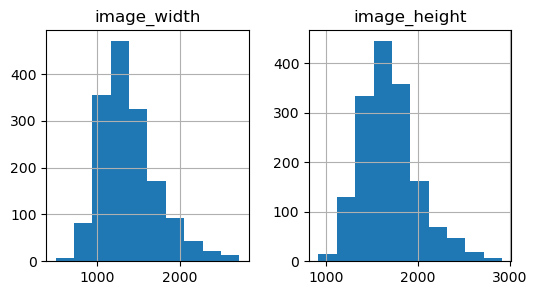

In [10]:
no_pneumonia_info_df[["image_width", "image_height"]].hist(figsize=(6,3), bins=10) 

array([[<AxesSubplot: title={'center': 'image_width'}>,
        <AxesSubplot: title={'center': 'image_height'}>]], dtype=object)

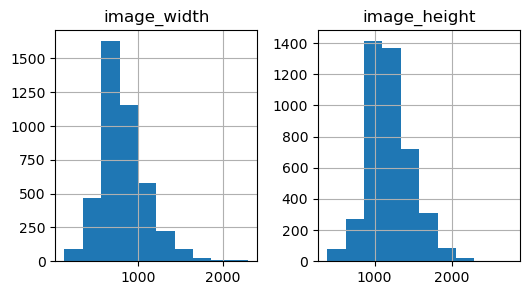

In [11]:
yes_pneumonia_info_df[["image_width", "image_height"]].hist(figsize=(6,3), bins=10) 

## 4. Feature Engineering
### 4.1 Resize all images

Because the size of images vary a lot, due to the architecture of machine learning mode, we must resize all the images to a uniformed size. Next I am going to reszie all images to the size **100 x 100** and store them to the Numpy Array.

In [12]:
data = []
label = []

image_size=100

for i, image_name in enumerate(no_pneumonia_list):
    if image_name.split(".")[1] == 'jpeg':
        image = cv2.imread(image_directory+"NORMAL/"+image_name)
        image = Image.fromarray(image, "RGB")
        image = image.resize((image_size, image_size))
        data.append(np.array(image))
        label.append(0)

for i, image_name in enumerate(yes_pneumonia_list):
    if image_name.split(".")[1] == 'jpeg':
        image = cv2.imread(image_directory+"PNEUMONIA/"+image_name)
        image = Image.fromarray(image, "RGB")
        image = image.resize((image_size, image_size))
        data.append(np.array(image))
        label.append(1)

In [13]:
data_array = {"image":data, "label":label}
data_df = pd.DataFrame(data_array)
data_df

,image,label
0,"[[[26, 26, 26], [28, 28, 28], [28, 28, 28], [2...",0
1,"[[[86, 86, 86], [54, 54, 54], [48, 48, 48], [7...",0
2,"[[[47, 47, 47], [65, 65, 65], [77, 77, 77], [8...",0
3,"[[[2, 2, 2], [13, 13, 13], [30, 30, 30], [42, ...",0
4,"[[[114, 114, 114], [120, 120, 120], [125, 125,...",0
...,...,...
5851,"[[[0, 0, 0], [2, 2, 2], [16, 16, 16], [82, 82,...",1
5852,"[[[39, 39, 39], [43, 43, 43], [47, 47, 47], [5...",1
5853,"[[[8, 8, 8], [1, 1, 1], [114, 114, 114], [41, ...",1
5854,"[[[40, 40, 40], [41, 41, 41], [41, 41, 41], [4...",1


### 4.2 Show example of "NORMAL" images and "PNEUMONIA" images

In [14]:
data_df_0=data_df.loc[(data_df["label"] == 0), ["image","label"]]
data_df_1=data_df.loc[(data_df["label"] == 1), ["image","label"]]

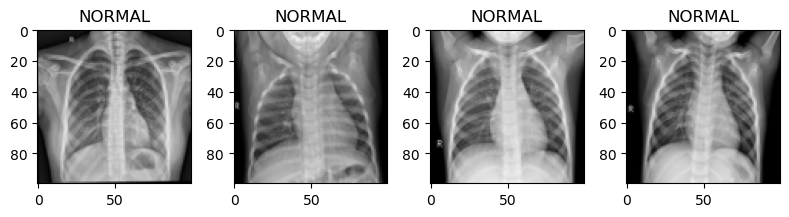

In [15]:
fig = plt.figure(figsize = (8, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(data_df_0.iloc[i]['image'])
    plt.title("NORMAL")
    
    plt.tight_layout()

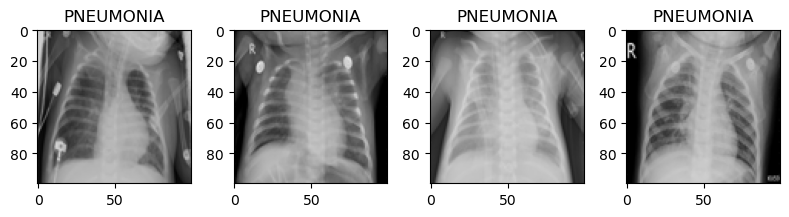

In [16]:
fig = plt.figure(figsize = (8, 4))
for j in range(4):
    plt.subplot(1, 4, j+1)
    plt.imshow(data_df_1.iloc[j]['image'])
    plt.title("PNEUMONIA")
        
    plt.tight_layout()

## 5. Build the model

In [17]:
from skimage import color
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [18]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models  import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input, Dense, Flatten, Dropout, Activation
from tensorflow.keras.utils import normalize, to_categorical

### 5.1 Define plotting function to visualize the performance ####

In [19]:
# Define function for plotting ROC
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Chest Pneumonia problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

In [20]:
# Define function for plotting accuracy and loss of the model 
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

### 5.2 Get a baseline performance using Random Forest ####

1. Train a Random Forest model with 200 trees on the training data.
2. Calculate the accuracy and roc_auc_score of the predictions.


In [21]:
# Split the data for training and testing
x_data=np.array(data)
y_label=np.array(label)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label, test_size=0.2, random_state=42, shuffle=True)

In [22]:
# Reshape/flatten the images from 100*100 to 10,000 columns
# x_train1 = np.asarray(x_train, dtype='object').reshape(-1, 100*100*3)/255
# x_test1 = np.asarray(x_test, dtype='object').reshape(-1, 100*100*3)/255
x_train1 = x_train.reshape(-1, 100*100*3)/255
x_test1 = x_test.reshape(-1, 100*100*3)/255

In [23]:
# Train the RF model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(x_train1, y_train)

RandomForestClassifier(n_estimators=200)

accuracy is 0.934
roc-auc is 0.979


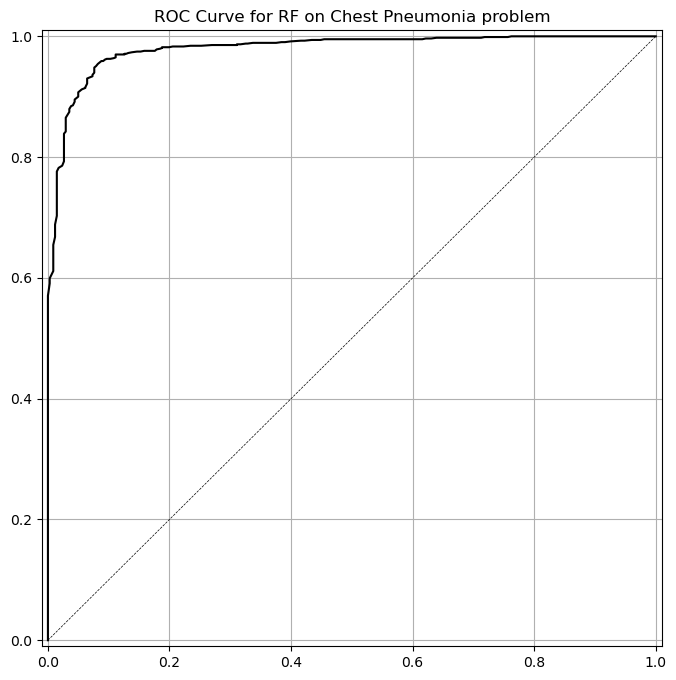

In [24]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(x_test1)
y_pred_prob_rf = rf_model.predict_proba(x_test1)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

# Plot ROC
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

**Conclusion:**
**With Random Forrest, accuracy is 0.934; roc-auc is 0.979. We use this as performance baseline.**

### 5.3 Model_1 - Build a Sequential CNN model with Categorical Cross Entrophy ####

In [25]:
# Split the data for training and testing
x_data=np.array(data)
y_label=np.array(label)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label, test_size=0.2, random_state=42, shuffle=True)

In [26]:
# Categorical Cross Entropy 
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

In [27]:
# Define the model_1
model_1 = Sequential()

# first layer
model_1.add(Conv2D(filters= 32, kernel_size=(3,3), input_shape=(image_size, image_size, 3)))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# 1st hidden layer
model_1.add(Conv2D(filters= 32, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# 2nd hidden layer
model_1.add(Conv2D(filters= 64, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer 
model_1.add(Flatten())
model_1.add(Dense(64))
model_1.add(Activation("relu"))
model_1.add(Dropout(0.5))

#Categorical Cross Entropy = 2, softmax   
model_1.add(Dense(2))
model_1.add(Activation("softmax"))
model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

2023-02-28 14:08:30.691787: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# View the model_1
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [29]:
# Perform model training
hist_1=model_1.fit(x_train, y_train_cat, batch_size=32, verbose=True, epochs=10, 
                   validation_data=(x_test, y_test_cat), shuffle=False)
model_1.save("model_1.h5")

Epoch 1/10
147/147 [==============================] - 13s 84ms/step - loss: 2.2597 - accuracy: 0.8247 - val_loss: 0.2582 - val_accuracy: 0.9070
Epoch 2/10
147/147 [==============================] - 12s 83ms/step - loss: 0.2783 - accuracy: 0.8856 - val_loss: 0.1907 - val_accuracy: 0.9326
Epoch 3/10
147/147 [==============================] - 13s 87ms/step - loss: 0.2192 - accuracy: 0.9041 - val_loss: 0.1857 - val_accuracy: 0.9437
Epoch 4/10
147/147 [==============================] - 13s 90ms/step - loss: 0.1914 - accuracy: 0.9180 - val_loss: 0.1644 - val_accuracy: 0.9437
Epoch 5/10
147/147 [==============================] - 13s 86ms/step - loss: 0.1684 - accuracy: 0.9246 - val_loss: 0.1704 - val_accuracy: 0.9369
Epoch 6/10
147/147 [==============================] - 13s 86ms/step - loss: 0.1661 - accuracy: 0.9353 - val_loss: 0.1627 - val_accuracy: 0.9403
Epoch 7/10
147/147 [==============================] - 13s 86ms/step - loss: 0.1604 - accuracy: 0.9321 - val_loss: 0.1756 - val_accuracy:

In [30]:
# Make predictions on the test set
# np.argmax(model.predict(x), axis=-1)`, if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
# (model.predict(x) > 0.5).astype("int32")`, if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

predict_x=model_1.predict(x_test) 
pred_class=np.argmax(predict_x,axis=1)

37/37 [==============================] - 1s 23ms/step


accuracy is 0.945
roc-auc is 0.981


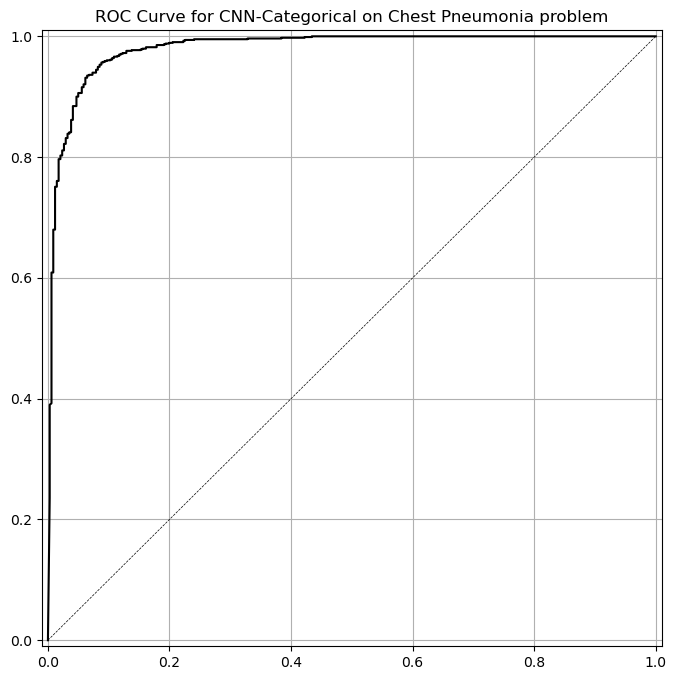

In [31]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,predict_x[:,1])))

plot_roc(y_test, predict_x[:,1], 'CNN-Categorical')

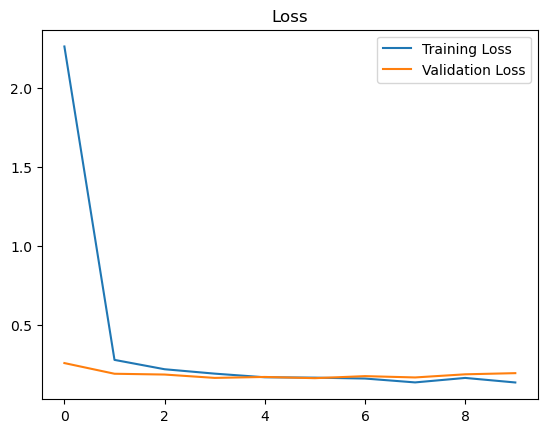

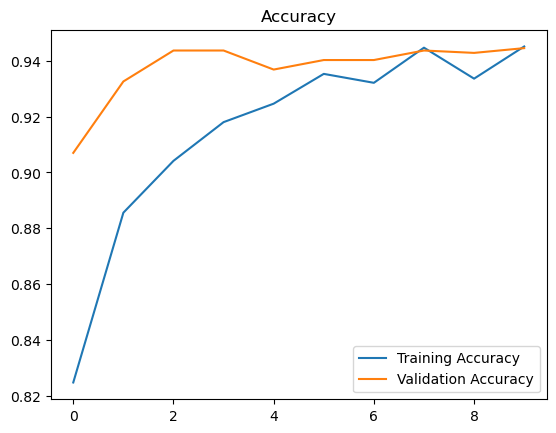

In [32]:
plot_metrics(hist_1.history)

### 5.4 Model_2 - Build a Sequential CNN model with Binary Cross Entrophy ####

In [33]:
# Split the data for training and testing
x_data=np.array(data)
y_label=np.array(label)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label, test_size=0.2, random_state=42, shuffle=True)

In [34]:
# Normalize data
x_train_norm = normalize(x_train, axis=1)
x_test_norm = normalize(x_test, axis=1)

In [35]:
# Define the model_2
model_2 = Sequential()

# first layer
model_2.add(Conv2D(filters= 32, kernel_size=(3,3), input_shape=(image_size, image_size, 3)))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# 1st hidden layer
model_2.add(Conv2D(filters= 32, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# 2nd hidden layer
model_2.add(Conv2D(filters= 64, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer 
model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(Activation("relu"))
model_2.add(Dropout(0.5))

# Binary Cross Entropy = 1, sigmoid 
model_2.add(Dense(1))
model_2.add(Activation("sigmoid"))
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# View the model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                  

In [37]:
# Perform model training
hist_2=model_2.fit(x_train_norm, y_train, batch_size=32, verbose=True, epochs=10, 
                   validation_data=(x_test_norm, y_test), shuffle=False)
model_2.save("model_2.h5")

Epoch 1/10
147/147 [==============================] - 12s 80ms/step - loss: 0.4425 - accuracy: 0.7906 - val_loss: 0.2906 - val_accuracy: 0.9087
Epoch 2/10
147/147 [==============================] - 12s 80ms/step - loss: 0.2507 - accuracy: 0.9052 - val_loss: 0.2249 - val_accuracy: 0.9206
Epoch 3/10
147/147 [==============================] - 12s 80ms/step - loss: 0.2212 - accuracy: 0.9193 - val_loss: 0.1990 - val_accuracy: 0.9309
Epoch 4/10
147/147 [==============================] - 12s 79ms/step - loss: 0.1910 - accuracy: 0.9313 - val_loss: 0.1810 - val_accuracy: 0.9343
Epoch 5/10
147/147 [==============================] - 12s 80ms/step - loss: 0.1777 - accuracy: 0.9293 - val_loss: 0.1615 - val_accuracy: 0.9420
Epoch 6/10
147/147 [==============================] - 12s 80ms/step - loss: 0.1628 - accuracy: 0.9409 - val_loss: 0.1519 - val_accuracy: 0.9445
Epoch 7/10
147/147 [==============================] - 12s 80ms/step - loss: 0.1513 - accuracy: 0.9432 - val_loss: 0.1451 - val_accuracy:

In [38]:
# Make predictions on the test set
# np.argmax(model.predict(x), axis=-1)`, if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
# (model.predict(x) > 0.5).astype("int32")`, if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

predict_x=model_2.predict(x_test_norm) 
pred_class=(predict_x > 0.5).astype("int32")

37/37 [==============================] - 1s 20ms/step


accuracy is 0.950
roc-auc is 0.984


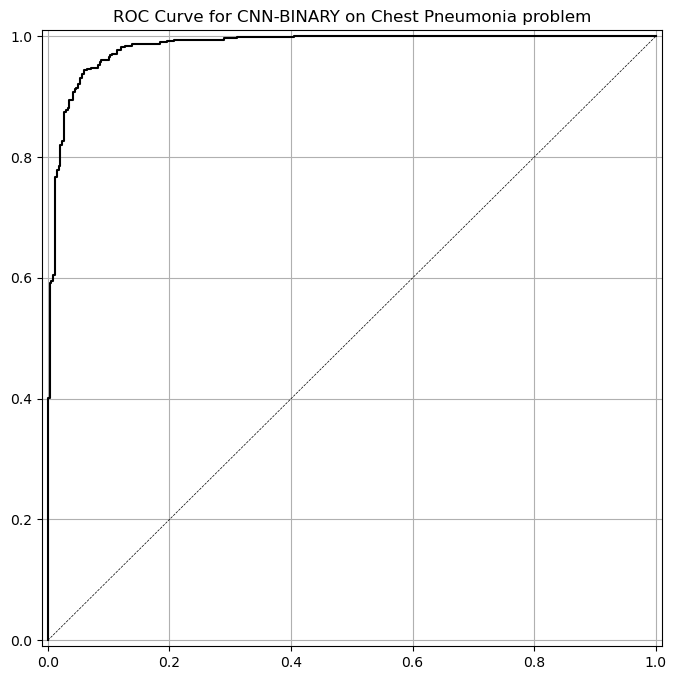

In [39]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,predict_x)))

plot_roc(y_test, predict_x, 'CNN-BINARY')

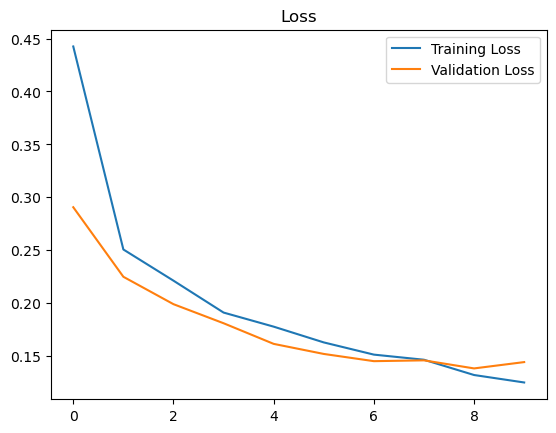

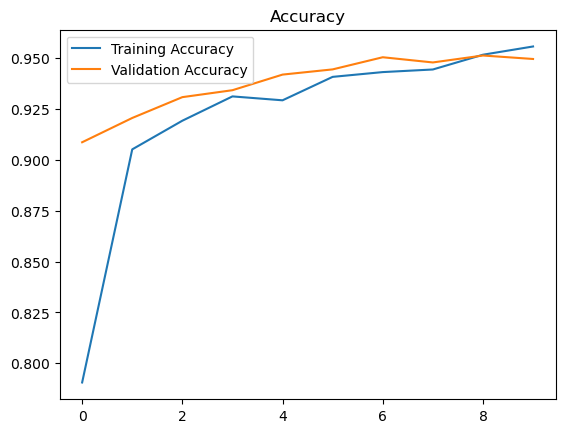

In [40]:
plot_metrics(hist_2.history)

### 5.5 Model_3 - Build a VGG16 model

In [41]:
from tensorflow.keras.applications import VGG16

In [42]:
# Split the data for training and testing
x_data=np.array(data)
y_label=np.array(label)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label, test_size=0.2, random_state=42, shuffle=True)

In [43]:
# Normalize data
x_train_norm = normalize(x_train, axis=1)
x_test_norm = normalize(x_test, axis=1)

In [44]:
model_3_base = VGG16(include_top = False, weights = "imagenet", 
                     input_shape = (image_size, image_size, 3))

for l in model_3_base.layers:
    l.trainable = False

model_3_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [45]:
# Build a VGG16 model
model_3 = Sequential()
model_3.add(model_3_base)
model_3.add(Flatten())

model_3.add(Dense(32 , activation = 'relu'))
model_3.add(Dense(64, activation = "relu"))
model_3.add(Dense(1 , activation = 'sigmoid'))
model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                147488    
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,864,353
Trainable params: 149,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [46]:
hist_3=model_3.fit(x_train_norm, y_train, batch_size=32, verbose=True, epochs=10, 
                   validation_data=(x_test_norm, y_test), shuffle=False)
model_3.save("model_3.h5")

Epoch 1/10
147/147 [==============================] - 72s 489ms/step - loss: 0.3342 - accuracy: 0.8529 - val_loss: 0.2589 - val_accuracy: 0.8985
Epoch 2/10
147/147 [==============================] - 78s 530ms/step - loss: 0.2060 - accuracy: 0.9155 - val_loss: 0.2062 - val_accuracy: 0.9232
Epoch 3/10
147/147 [==============================] - 76s 520ms/step - loss: 0.1819 - accuracy: 0.9251 - val_loss: 0.1977 - val_accuracy: 0.9266
Epoch 4/10
147/147 [==============================] - 77s 523ms/step - loss: 0.1643 - accuracy: 0.9342 - val_loss: 0.1932 - val_accuracy: 0.9258
Epoch 5/10
147/147 [==============================] - 79s 535ms/step - loss: 0.1514 - accuracy: 0.9421 - val_loss: 0.1943 - val_accuracy: 0.9283
Epoch 6/10
147/147 [==============================] - 79s 538ms/step - loss: 0.1433 - accuracy: 0.9458 - val_loss: 0.1912 - val_accuracy: 0.9300
Epoch 7/10
147/147 [==============================] - 78s 532ms/step - loss: 0.1364 - accuracy: 0.9498 - val_loss: 0.1940 - val_ac

In [47]:
# Make predictions on the test set
# np.argmax(model.predict(x), axis=-1)`, if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
# (model.predict(x) > 0.5).astype("int32")`, if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

predict_x=model_3.predict(x_test_norm) 
pred_class=(predict_x > 0.5).astype("int32")

37/37 [==============================] - 16s 424ms/step


accuracy is 0.931
roc-auc is 0.978


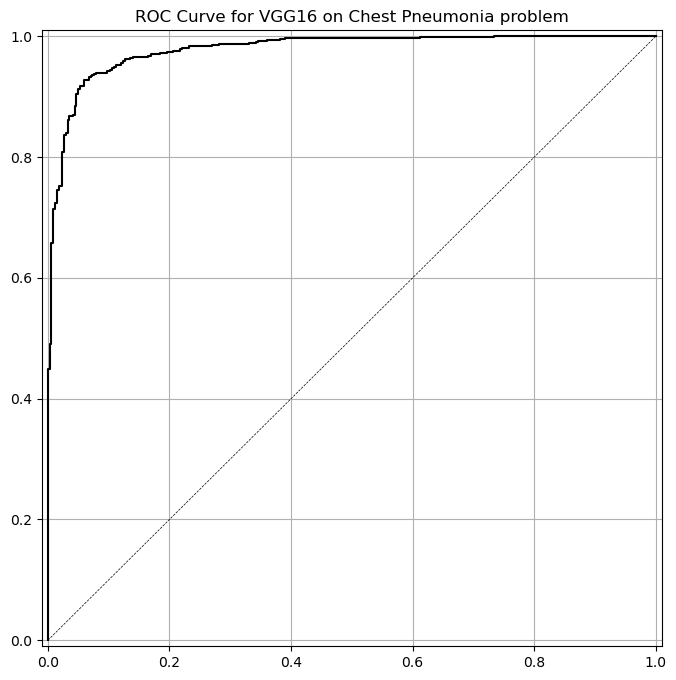

In [48]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,predict_x)))

plot_roc(y_test, predict_x, 'VGG16')

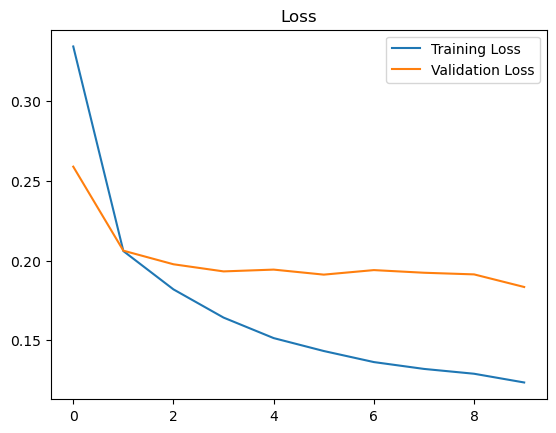

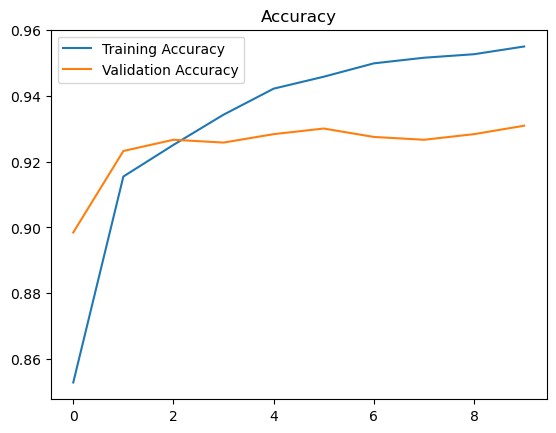

In [49]:
plot_metrics(hist_3.history)

## 6.0 Findings and Suggestion

In this work, I built a Random Forrest model and calculate their performance as baseline as follows:
- accuracy is 0.934
- roc-auc is 0.979

Then, I built the following 3 machine learning models to see whether they can provide better performance than the baseline model, and also I compared the performance of these 3 machine learning model to see how different machine learning methods would impact the performance of machine learning models:

- Model_1: CNN with categorical cross entrophy set for loss parameter for compliation
- Model_2: CNN with binary cross entrophy set for loss parameter for complilation
- Model_3: with VGG16 application applied to base layers, and with binary cross entrophy set for loss parameter for compilation 

The following table shows the performance of 3 machine learning models I built in this work. 


| Model | Train Accuracy | Test Accuracy | Train Loss | Test Loss | ROC-AUC |
| ----- | -------------- | ------------- | ---------- | --------- | --------|
| mode1_1 CNN with Categorical Cross Entrophy | 0.945 | 0.945 | 0.136 | 0.194 | 0.981 | 
| model_2 CNN with Binary Cross Entrophy      | 0.956 | 0.950 | 0.125 | 0.144 | 0.984 | 
| model_3 VGG16| 0.955 | 0.931 | 0.124 | 0.183 | 0.978 | 

#### Findings: 
1. The table above shows all 3 deep learning models work very well for detection of PNEUMONIA. 
2. The differentiation on performance among the 3 models looks very small. However, 
   - the 2 CNN models (i.e. model_1 and model_2) looks working a bit better than the VGG16 model. 
   - Comparing model_1 and model_2, the model_2 has better accuracy, lower loss rate, and higher ROC-AUC scores. However, the difference is minimal so as to be ignorable. This indicates that both binary or categorical cross entrophy could work euqally well in this work.


3. Comparing the 3 deep learning models with the baseline performance resulted from Random Forrest model (accuracy rate 0.934 and roc-auc score 0.979), I found: 
   - the VGG16 model (i.e. model_3) has test accuracy rate (0.931) almost equivelent to baseline.
   - both CNN models (i.e. the model_1 with categorical cross entrophy, and the model_2 with binary cross entrophy) works better than the baseline model built by Random Forrest in this work: model_1 with test accuracy 0.945 and model_2 with test accuracy 0.950. However, the performance differentiation is not significant.


4. Based on the comparison above, I would say: specifically in this work, the deep learning model perhaps isn't necessary the only option we may apply in order to gain a better performance on detection of PNEUMONIA.


#### Flaws and Suggestion:
The primary flaw in this work is that none of the models has ability to detect the types of PNEUMONIA. I would suggest next in future to continue this work on:
1. detecting different types of PNEUMONIA
2. detecting the lung cancer